In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [2]:
data = pd.read_csv("IBM Attrition Data.csv")
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [3]:
print("Indices of the dataset is {}\n".format(data.index))

Indices of the dataset is RangeIndex(start=0, stop=1470, step=1)



In [4]:
print("Shape of the dataset is {}\n".format(data.shape))

Shape of the dataset is (1470, 13)



In [5]:
print("There are {} columns, they are named as\n {}".format(len(data.columns),data.columns))

There are 13 columns, they are named as
 Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')


We need to find what columns are numerical and what columns are categorical

In [6]:
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


The numerical features are Age, DistanceFromHome, MonthlyIncome, NumCompaniesWorked, YearsAtCompany.
While the rest are categorical features.
Though the data types are not in properly assigned. We will work on that later down the  road.

In [8]:
data.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


#### Univariate analysis

Text(0, 0.5, 'Frequency')

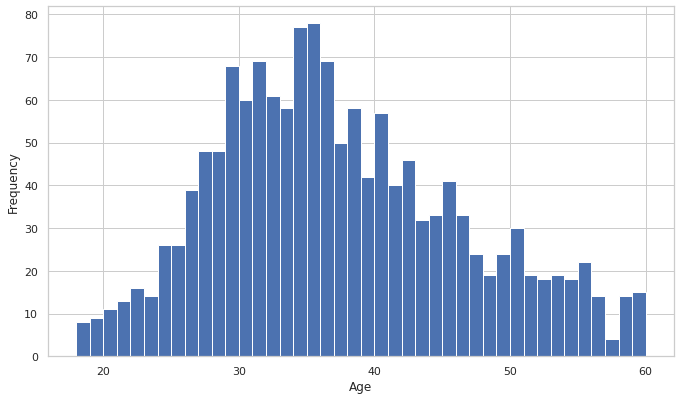

In [9]:
plt.figure(figsize=[10,6])
bins_edges = np.arange(18, data["Age"].max()+1, 1)
plt.hist(data=data, x="Age", bins=bins_edges)
plt.xlabel("Age")
plt.ylabel("Frequency")

**First** - Plot is **Age** distribution of employees.

In the above plot the bin range is from 18 to 60. Majority of employees are in the range 30-37 years. There are employees under 20 years and account for 20 or less. And there are employees in there 60's also.

In [10]:
print("There are {} employees below 20 years age".format(data[data["Age"]<20].count()[0]))
print("There are {} employees of 60 years age".format(data[data["Age"]==60].count()[12]))

There are 17 employees below 20 years age
There are 5 employees of 60 years age


Text(0, 0.5, 'Frequency')

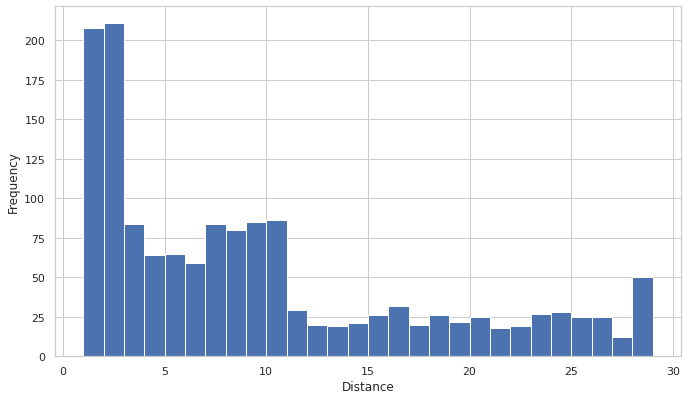

In [11]:
plt.figure(figsize=[10,6])
bins_edges = np.arange(1, data["DistanceFromHome"].max()+1, 1)
plt.hist(data=data, x="DistanceFromHome", bins=bins_edges)
plt.xlabel("Distance")
plt.ylabel("Frequency")

From the figure we can see that it is right skewed. A majority of people reside within 10. A less number of population reside away more than 20.

In [12]:
print("Number of people residing in 20 or more away from office: {}".format(data.loc[data["DistanceFromHome"]>=20].count()[3]))
print("Number of people residing in 10 or less away from office: {}".format(data.loc[data["DistanceFromHome"]<=10].count()[3]))

Number of people residing in 20 or more away from office: 229
Number of people residing in 10 or less away from office: 1026


Text(0, 0.5, 'Frequency')

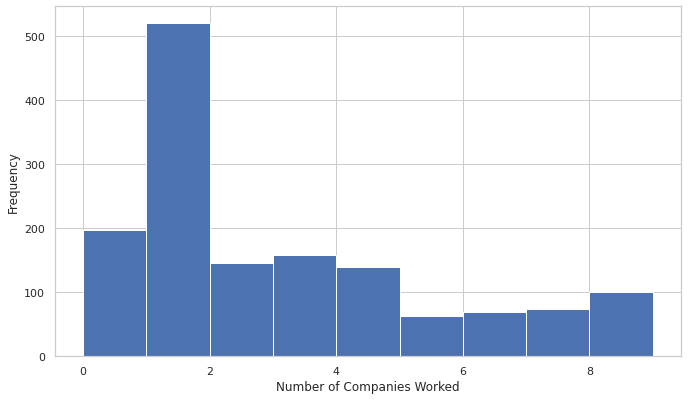

In [13]:
plt.figure(figsize=[10,6])
bins_edges = np.arange(0, data["NumCompaniesWorked"].max()+1, 1)
plt.hist(data=data, x="NumCompaniesWorked", bins=bins_edges)
plt.xlabel("Number of Companies Worked")
plt.ylabel("Frequency")

By looking at the plot it seems right skewed. Maximum number of employees have worked in less than 2 companies.

**Note:** Here we are not talking about employees year experience.

In [14]:
print("Total employees that have either not worked at any company or have worked in less than 2 companies are: {}"
      .format(data.loc[data["NumCompaniesWorked"]<=2].count()[10]))

Total employees that have either not worked at any company or have worked in less than 2 companies are: 864


Text(0, 0.5, 'Frequency')

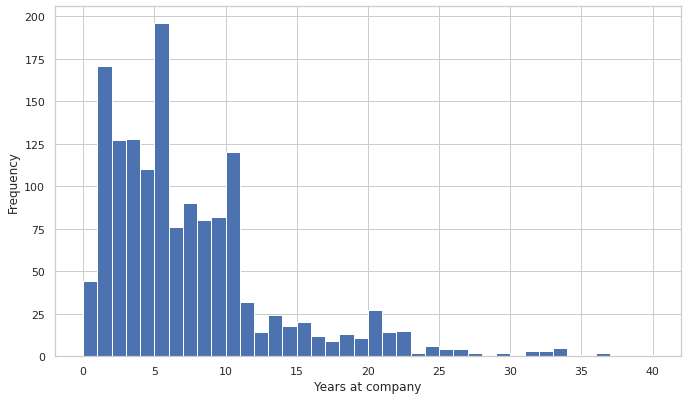

In [15]:
plt.figure(figsize=[10,6])
bins_edges = np.arange(0, data["YearsAtCompany"].max()+1, 1)
plt.hist(data=data, x="YearsAtCompany", bins=bins_edges)
plt.xlabel("Years at company")
plt.ylabel("Frequency")

Here we can see that the data is right skewed. A large portion of employees are under 10 years experience. There are some employees who have more than 35 years of experience.

In [16]:
print("Total employees having 35 or more years of experience: {}".format(data.loc[data["YearsAtCompany"]>=35].count()[-1]))
print("Total employees having 10 or less years of experience: {}".format(data.loc[data["YearsAtCompany"]<=10].count()[-1]))

Total employees having 35 or more years of experience: 4
Total employees having 10 or less years of experience: 1224


Text(0, 0.5, 'Frequency')

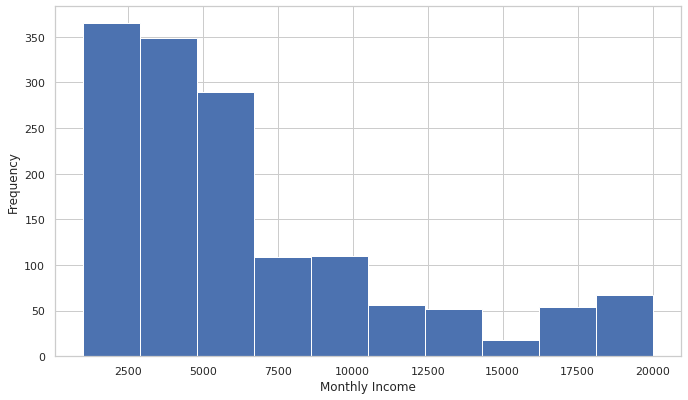

In [17]:
plt.figure(figsize=[10,6])
#bins_edges = np.arange(1009, data["MonthlyIncome"].max()+1, 1)
plt.hist(data=data, x="MonthlyIncome") #, bins=bins_edges
plt.xlabel("Monthly Income")
plt.ylabel("Frequency")

Here we have not taken bin_edges as before because the data is salary and it varies largely i.e., we have a huge gap between 1009 minimum salary and 19999 maximum salary. So we took bin as default in matplotlib.

The Monthly Income distribution is still right skewed.

Large proportion of employees earn under 5000 and few employees earn above 15000 monthly.

In [18]:
print("Total employees earning 5000 or less monthly: {}".format(data.loc[data["MonthlyIncome"]<=5000].count()["MonthlyIncome"]))
print("Total employees earning 15000 or above monthly: {}".format(data.loc[data["MonthlyIncome"]>=15000].count()["MonthlyIncome"]))

Total employees earning 5000 or less monthly: 749
Total employees earning 15000 or above monthly: 133


<AxesSubplot:xlabel='Age'>

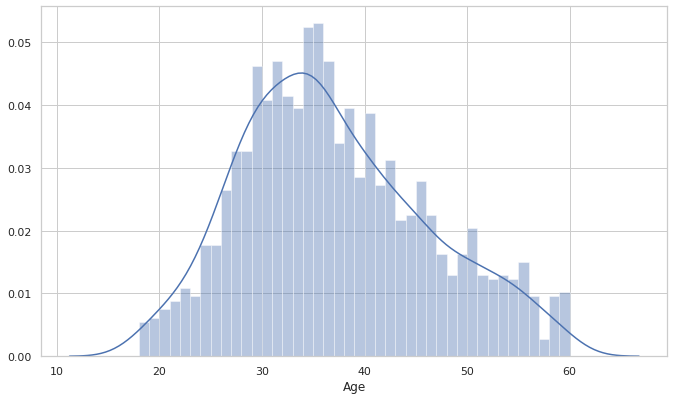

In [19]:
plt.figure(figsize=[10,6])
bins_edges = np.arange(18, data["Age"].max()+1, 1)
sns.distplot(data["Age"], bins=bins_edges)

<AxesSubplot:xlabel='DistanceFromHome'>

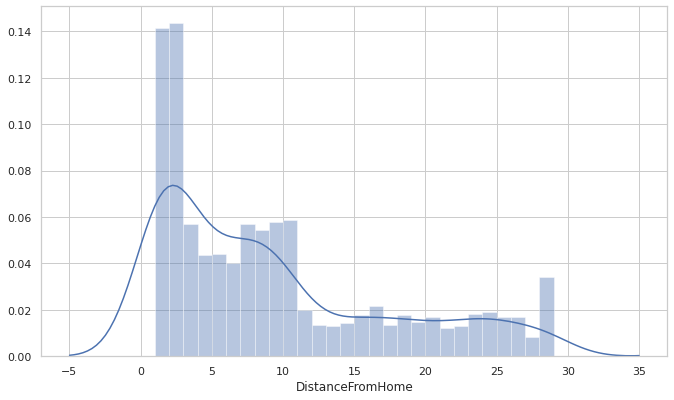

In [20]:
plt.figure(figsize=[10,6])
bins_edges = np.arange(1, data["DistanceFromHome"].max()+1, 1)
sns.distplot(data["DistanceFromHome"], bins=bins_edges)

<AxesSubplot:xlabel='NumCompaniesWorked'>

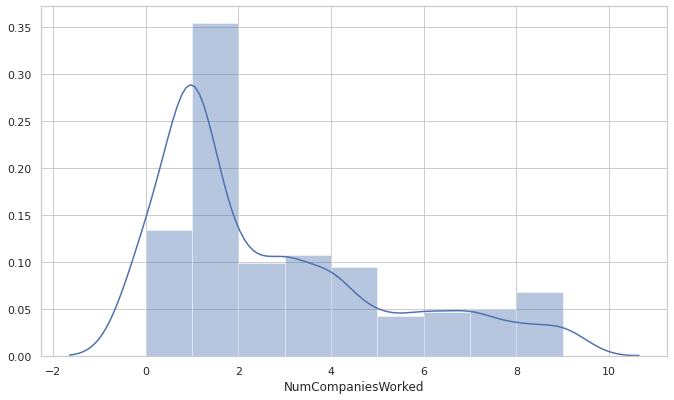

In [21]:
plt.figure(figsize=[10,6])
bins_edges = np.arange(0, data["NumCompaniesWorked"].max()+1, 1)
sns.distplot(data["NumCompaniesWorked"], bins=bins_edges)

<AxesSubplot:xlabel='YearsAtCompany'>

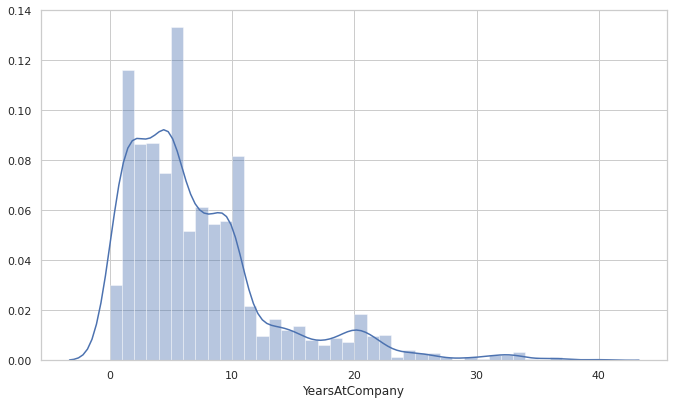

In [22]:
plt.figure(figsize=[10,6])
bins_edges = np.arange(0, data["YearsAtCompany"].max()+1, 1)
sns.distplot(data["YearsAtCompany"], bins=bins_edges)

<AxesSubplot:xlabel='MonthlyIncome'>

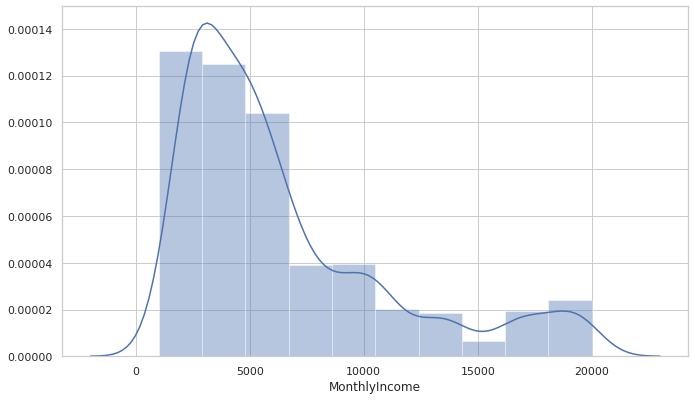

In [23]:
plt.figure(figsize=[10,6])
sns.distplot(data["MonthlyIncome"], bins=10)

In [24]:
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


Categprical features:

- Department
- Education 
- EducationField
- EnvironmentSatisfaction
- JobSatisfaction
- MaritalStatus
- NumCompaniesWorked
- WorkLifeBalance
    
Now lets see what are the categorical values in each feature.

In [25]:
data["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='count'>

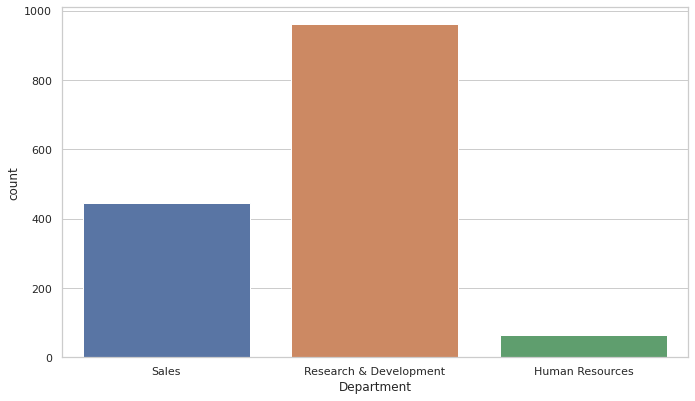

In [26]:
plt.figure(figsize=[10,6])
sns.countplot(data["Department"])

Highest number of employees are in Research & Development department, then in Sales department and then in Human Resources.
This means that the company emphasizes more on R&D. Its technically advanced.

In [27]:
data["Education"].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

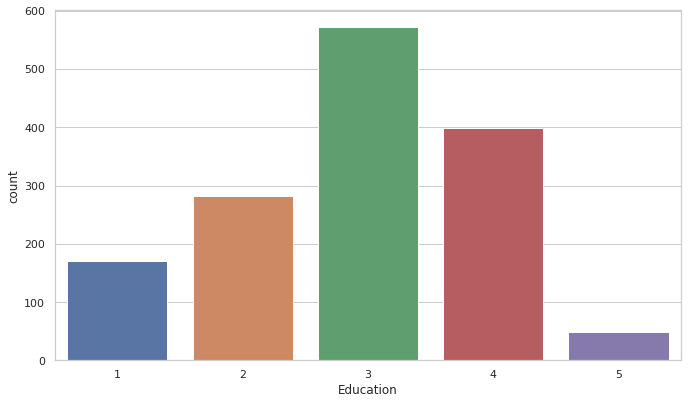

In [28]:
plt.figure(figsize=[10,6])
sns.countplot(data["Education"])

By looking at project description we infer:
- Most people (ie 572) hold bachelor degree (3)
- Least people (ie 48) hold doctoral degree (5)

**Fourth**

In [29]:
data["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<AxesSubplot:xlabel='EducationField', ylabel='count'>

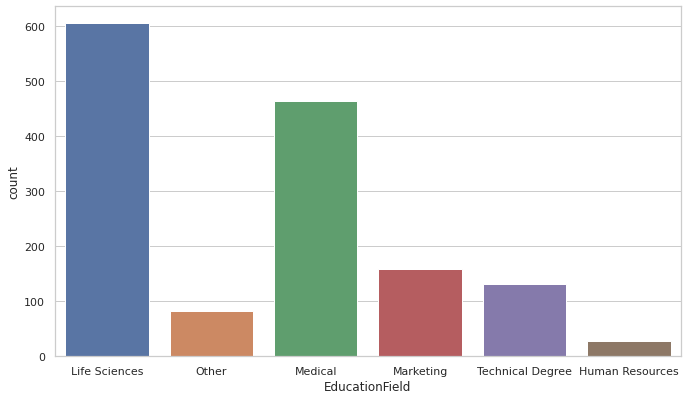

In [30]:
plt.figure(figsize=[10,6])
sns.countplot(data["EducationField"])

Its a representation of what sort of degree individuals hold. They are categorized under 6 categories.
- People having Life sciences related degree tend to be around 606
- People having Medical related degree tend to be aroung 464
- People having Marketing related degree tend to be around 159
- People who have below college education are under Other category and they tend to be 82

In [31]:
data["EnvironmentSatisfaction"].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

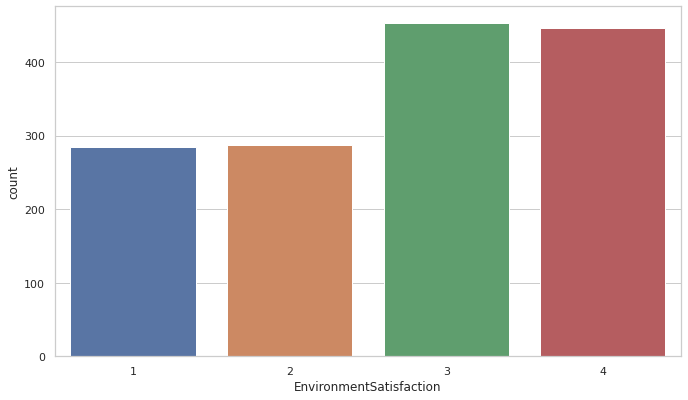

In [32]:
plt.figure(figsize=[10,6])
sns.countplot(data["EnvironmentSatisfaction"])

- The are 899 people who are High and Very High satisfied with there Environment.
- There 284 people who are Very Low in Environment satisfaction.

In [33]:
data["JobSatisfaction"].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

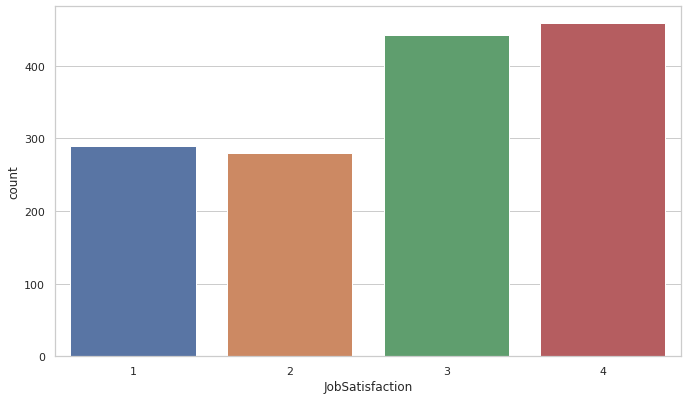

In [34]:
plt.figure(figsize=[10,6])
sns.countplot(data["JobSatisfaction"])

- 459 number of people are very highly satisfied with there job.
- 289 number of people are very lowly satisfied with there job.

**Fifth**

In [35]:
data["MaritalStatus"].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

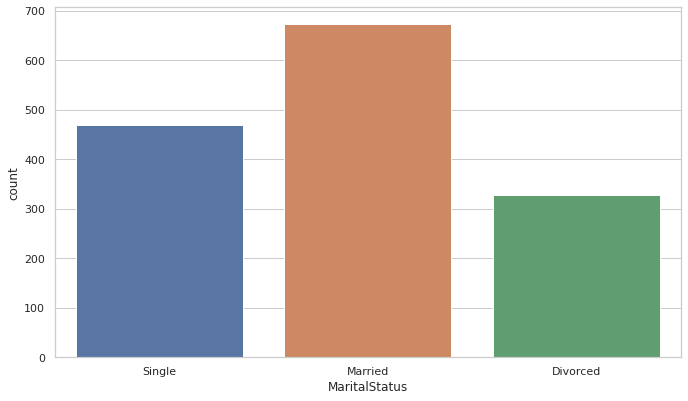

In [36]:
plt.figure(figsize=[10,6])
sns.countplot(data["MaritalStatus"])

We can see from the plot most people working in the company are Married, then single, then divorced.

In [37]:
data["NumCompaniesWorked"].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

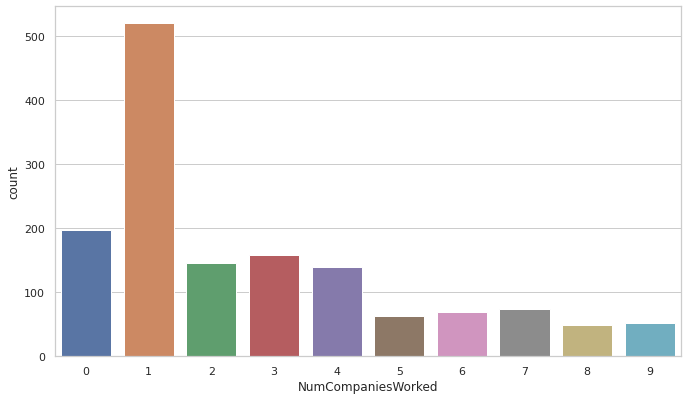

In [38]:
plt.figure(figsize=[10,6])
sns.countplot(data["NumCompaniesWorked"])

- 521 number of employees have worked in 1 previous company.
- 197 number of employees are freshers.
- 52 number of employees who have worked at 9 companies previously.

In [39]:
data["WorkLifeBalance"].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

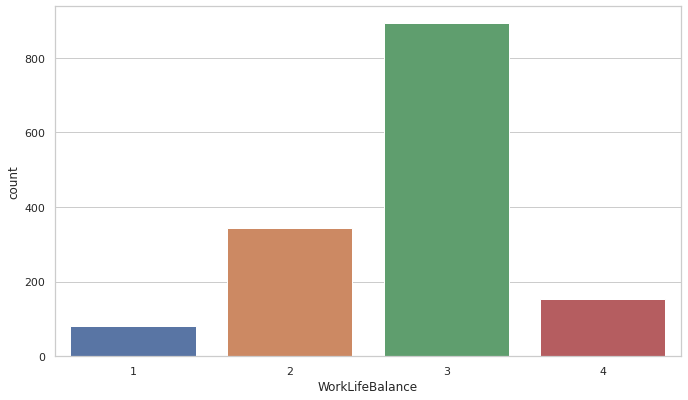

In [40]:
plt.figure(figsize=[10,6])
sns.countplot(data["WorkLifeBalance"])

- 893 employees have better work life balance.
- 80 employees have bad work life balance.

**Second** - Explore attrition by age is below.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

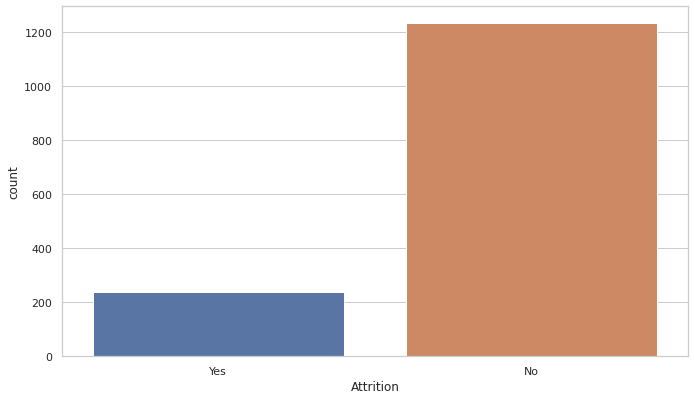

In [41]:
plt.figure(figsize=[10,6])
sns.countplot(data=data, x="Attrition")

Note: The number of observations belonging to the "No" category is far more than the number of observation belonging to "Yes" category. This is a typical **imbalanced classification problem**.

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

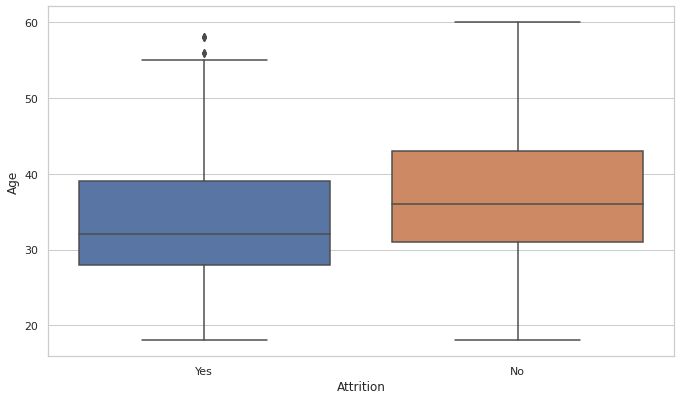

In [42]:
plt.figure(figsize=[10,6])
sns.boxplot(data=data, x="Attrition", y="Age")

We have outliers in Yes - attrition.

In [43]:
data.groupby(["Attrition"]).Age.agg(["min", "max", "count"])

,min,max,count
Attrition,,,
No,18,60,1233
Yes,18,58,237


Here we broken the attrition label to infer, minimum age for no attrition is 18 and max is 60 and account for 1233 employees.

Minimum age for attrition is 18, maximum age is 58 and only account for 237 employees.

In [44]:
data["Age_cat"] = data["Age"].apply(lambda x: "20_under" if x<=20 else ("20_40_under" if (x>20 and x<=40) else "40_60_under"))

In [45]:
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Age_cat
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,40_60_under
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,40_60_under
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,20_40_under
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,20_40_under
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2,20_40_under


/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x432 with 0 Axes>

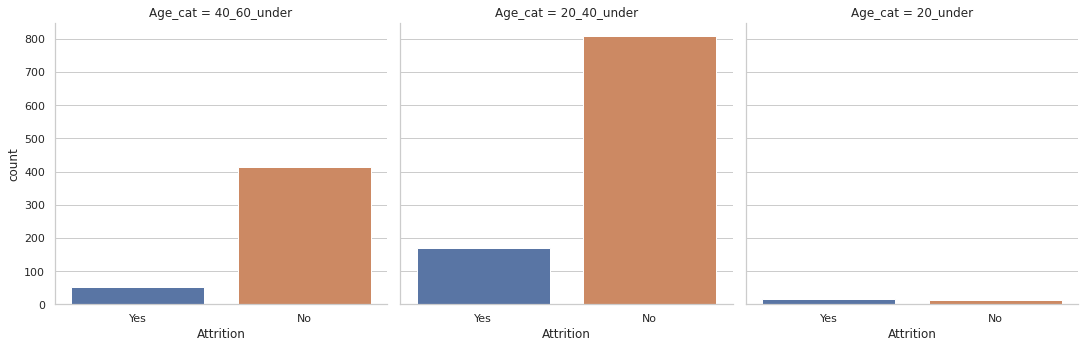

In [46]:
plt.figure(figsize=[10,6])
sns.factorplot(data=data, kind="count", x="Attrition", col="Age_cat")

We can see employees under 20 years age, more people are to leave the company.

In [47]:
data.drop("Age_cat", axis=1, inplace=True)

In [48]:
data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

**Third**

Total employees left 237

In [49]:
data.head(2)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10


In [50]:
data.groupby(["Department", "MaritalStatus"]).size()

Department              MaritalStatus
Human Resources         Divorced          16
                        Married           34
                        Single            13
Research & Development  Divorced         224
                        Married          433
                        Single           304
Sales                   Divorced          87
                        Married          206
                        Single           153
dtype: int64

Here the data is represented as under each department HR, R&D and Sales how many are Single, Married and Divorced

In [51]:
data.groupby(["Department","Education"]).Age.agg(["min", "max", "count"])

min  max  count
Department             Education                 
Human Resources        1           24   42      5
                       2           19   59     13
                       3           24   54     27
                       4           26   59     15
                       5           31   44      3
Research & Development 1           18   58    115
                       2           18   57    182
                       3           18   60    379
                       4           22   60    255
                       5           27   54     30
Sales                  1           19   59     50
                       2           18   59     87
                       3           18   60    166
                       4           24   60    128
                       5           30   56     15

Minimum age, Maximum Age and Count of employees Department + Education wise.
- We can infer under Research and Developement department there are young people recruited as low as 18 years of age and max 58 years who are below degree account for 115 employees. And minimum 27 years of age with doctoral degree max 54 years of age with doctoral degree account for 30 employees.
- Under HR department Below degree employees minimum age 24 and maximum age 42 account for 5 employees. Doctoral degree employees minimum age 31 and max age 44 account for 3 employees.
- Under Sales department Below degree employees minimum age 19 and maximum age 59 account for 50 employees. Doctoral degree employees minimum age 30 and max age 56 account for 15 employees.

In [52]:
data.groupby(["Department","EducationField"]).Age.agg(["count"])

count
Department             EducationField         
Human Resources        Human Resources      27
                       Life Sciences        16
                       Medical              13
                       Other                 3
                       Technical Degree      4
Research & Development Life Sciences       440
                       Medical             363
                       Other                64
                       Technical Degree     94
Sales                  Life Sciences       150
                       Marketing           159
                       Medical              88
                       Other                15
                       Technical Degree     34

Here we are infereing how may employees are from what education field.
- R&D have most employees from Life Sciences and Medical education field.
- Sales have most employees from Life Sciences and Marketing education field.
- HR have most employees from Human Resource and Life Sciences education field.

In [53]:
data.groupby(["Department", "EnvironmentSatisfaction"]).Age.agg(["count"])

count
Department             EnvironmentSatisfaction       
Human Resources        1                           11
                       2                           12
                       3                           26
                       4                           14
Research & Development 1                          187
                       2                          177
                       3                          292
                       4                          305
Sales                  1                           86
                       2                           98
                       3                          135
                       4                          127

- Under R&D 364 (187,177) employees are low to medium in environmental satisfaction and 305 employees are very high in environmental satisfaction. The company must work towards making the environment more employee friendly.
- Under Human Resources the response is mixed.
- Under Sales the most of the employees are highly and very highly satisfied.
- There are 571 employees who are not very fond of their environment(low to medium).

In [54]:
data.groupby(["Department", "JobSatisfaction"]).Age.agg(["count"])

count
Department             JobSatisfaction       
Human Resources        1                   11
                       2                   20
                       3                   15
                       4                   17
Research & Development 1                  192
                       2                  174
                       3                  300
                       4                  295
Sales                  1                   86
                       2                   86
                       3                  127
                       4                  147

- Under R&D 366 (192,174) employees are low to medium in job satisfaction and 595 (300,295) employees are high to very high in job satisfaction. If not taken care of the employees they might resign from the company.
- Under Human Resources the response is mixed.
- Under Sales most of the employees are highly and very highly satisfied with there job.
- There are total 569 employees who are not satisfied (low to medium) with their job.

In [55]:
data.groupby(["Department", "NumCompaniesWorked"]).Age.agg(["count"])

count
Department             NumCompaniesWorked       
Human Resources        0                      12
                       1                      19
                       2                       3
                       3                       5
                       4                      10
                       5                       1
                       6                       4
                       7                       1
                       8                       3
                       9                       5
Research & Development 0                     120
                       1                     340
                       2                      98
                       3                     108
                       4                      90
                       5                      42
                       6                      49
                       7                      47
                       8                      29
                       9                      38
Sales                  0                      65
                       1                     162
                       2                      45
                       3                      46
                       4                      39
                       5                      20
                       6                      17
                       7                      26
                       8                      17
                       9                       9

- Total 197 employees have not previously worked at any company.
- Total 52 employees have previously worked at 9 companies.
- Under R&D 558 employees have worked in less than 3 companies.

In [56]:
data.groupby(["Department", "WorkLifeBalance"]).Age.agg(["count"])

count
Department             WorkLifeBalance       
Human Resources        1                    4
                       2                    7
                       3                   42
                       4                   10
Research & Development 1                   60
                       2                  235
                       3                  575
                       4                   91
Sales                  1                   16
                       2                  102
                       3                  276
                       4                   52

- Under HR department most of the employees have great work life balance.
- Under R&D 295 employees have bad-good work life balance, whereas 666 employees have better-best work life balance.
- Under Sales 118 employees have bad-good work life balance.

In [57]:
data.groupby(["Department", "Attrition"]).Age.agg(["count"])

count
Department             Attrition       
Human Resources        No            51
                       Yes           12
Research & Development No           828
                       Yes          133
Sales                  No           354
                       Yes           92

From the given dataset we can infer
- Total 237 employees are leaving the job due to personal or professional reason

In [58]:
data.head(2)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10


In [59]:
data.groupby(["Education", "EnvironmentSatisfaction"]).Age.agg(["count"])

count
Education EnvironmentSatisfaction       
1         1                           27
          2                           38
          3                           56
          4                           49
2         1                           55
          2                           60
          3                           77
          4                           90
3         1                          105
          2                           97
          3                          191
          4                          179
4         1                           88
          2                           78
          3                          119
          4                          113
5         1                            9
          2                           14
          3                           10
          4                           15

Here we get a detailed information:
- Below College (1) employees have a mixed response on EnvironmentSatisfaction.
- College (2) employees also have mixed response on EnvironmentSatisfaction.
- Bachelor (3) employees tend to be more satisfied.
- Master (4) employees also tend to be more satisfied.
- Doctor (5) employees have a mixed response.
- Overall Bachelor degree employees tend to be more satisfied on EnvironmentSatisfaction.

In [60]:
data.groupby(["Education", "JobSatisfaction"]).Age.agg(["count"])

count
Education JobSatisfaction       
1         1                   32
          2                   26
          3                   56
          4                   56
2         1                   52
          2                   54
          3                   83
          4                   93
3         1                  118
          2                  128
          3                  161
          4                  165
4         1                   74
          2                   67
          3                  127
          4                  130
5         1                   13
          2                    5
          3                   15
          4                   15

Here we can also see Bachelor degree employees tend to be more satisfied on JobSatisfaction.
Total bachelor degree employees: 572, of them 326 are ssatisfied with their job.

In [61]:
data.groupby(["Education", "MaritalStatus"]).Age.agg(["count"])

count
Education MaritalStatus       
1         Divorced          32
          Married           82
          Single            56
2         Divorced          72
          Married          130
          Single            80
3         Divorced         125
          Married          253
          Single           194
4         Divorced          90
          Married          182
          Single           126
5         Divorced           8
          Married           26
          Single            14

Highest number of Divorced, Married, Single employees all possess bachelor degree. Then under Master degree. Lastly under Doctor degree

In [62]:
data.groupby(["Education", "WorkLifeBalance"]).Age.agg(["count"])

count
Education WorkLifeBalance       
1         1                    6
          2                   43
          3                  104
          4                   17
2         1                   16
          2                   65
          3                  170
          4                   31
3         1                   34
          2                  142
          3                  341
          4                   55
4         1                   22
          2                   86
          3                  243
          4                   47
5         1                    2
          2                    8
          3                   35
          4                    3

In [63]:
data.groupby(["EducationField", "EnvironmentSatisfaction"]).Age.agg(["count"])

count
EducationField   EnvironmentSatisfaction       
Human Resources  1                            5
                 2                            4
                 3                           13
                 4                            5
Life Sciences    1                          130
                 2                          112
                 3                          180
                 4                          184
Marketing        1                           29
                 2                           33
                 3                           50
                 4                           47
Medical          1                           87
                 2                          107
                 3                          134
                 4                          136
Other            1                           10
                 2                           11
                 3                           29
                 4                           32
Technical Degree 1                           23
                 2                           20
                 3                           47
                 4                           42

In LifeSciences education field 242 employees are low + medium on environment satisfaction and at the same time 364 employees are high + very high on environment satisfaction.
In Medical education field 194 employees are low + medium on environment satisfaction and at the same time 270 employees are high + very high on environment satisfaction.

In [64]:
data.groupby(["EducationField", "JobSatisfaction"]).Age.agg(["count"])

count
EducationField   JobSatisfaction       
Human Resources  1                    6
                 2                    8
                 3                    5
                 4                    8
Life Sciences    1                  113
                 2                  101
                 3                  188
                 4                  204
Marketing        1                   33
                 2                   40
                 3                   35
                 4                   51
Medical          1                   95
                 2                   87
                 3                  148
                 4                  134
Other            1                   16
                 2                   16
                 3                   23
                 4                   27
Technical Degree 1                   26
                 2                   28
                 3                   43
                 4                   35

in LifeSciences education field 214 employees are low + medium on job satisfaction whereas 392 employees are high + very high on job satisfaction.

In [65]:
data.groupby(["EducationField", "MaritalStatus"]).Age.agg(["count"])

count
EducationField   MaritalStatus       
Human Resources  Divorced           7
                 Married           18
                 Single             2
Life Sciences    Divorced         134
                 Married          271
                 Single           201
Marketing        Divorced          34
                 Married           77
                 Single            48
Medical          Divorced         107
                 Married          210
                 Single           147
Other            Divorced          19
                 Married           36
                 Single            27
Technical Degree Divorced          26
                 Married           61
                 Single            45

Employees with LifeSciences education field have highest number of Divorced, Married, Single employees.

In [66]:
data.head(2)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10


In [67]:
data.groupby(["EnvironmentSatisfaction", "JobSatisfaction"]).Age.agg(["count"])

count
EnvironmentSatisfaction JobSatisfaction       
1                       1                   53
                        2                   47
                        3                  100
                        4                   84
2                       1                   55
                        2                   59
                        3                   84
                        4                   89
3                       1                   94
                        2                   87
                        3                  128
                        4                  144
4                       1                   87
                        2                   87
                        3                  130
                        4                  142

Employees that are very high satisfied with environment are also high + very high on job satisfaction and account for 272 employees. 174 employees are low + medium satisfied on job satisfaction.
Employees that are low satisfied with environment are high + very high on job satisfaction and account for 184 employees.

In [68]:
data.groupby(["EnvironmentSatisfaction", "MaritalStatus"]).Age.agg(["count"])

count
EnvironmentSatisfaction MaritalStatus       
1                       Divorced          64
                        Married          124
                        Single            96
2                       Divorced          58
                        Married          143
                        Single            86
3                       Divorced          99
                        Married          220
                        Single           134
4                       Divorced         106
                        Married          186
                        Single           154

Under low environment satisfied employees 64-divorced, 124-married and 96-single.

Under very-high environment satisfied employees 106-divorced, 186-married and 154-single.

In [69]:
data.groupby(["JobSatisfaction", "WorkLifeBalance"]).Age.agg(["count"])

count
JobSatisfaction WorkLifeBalance       
1               1                   17
                2                   61
                3                  182
                4                   29
2               1                   18
                2                   58
                3                  175
                4                   29
3               1                   21
                2                  101
                3                  273
                4                   47
4               1                   24
                2                  124
                3                  263
                4                   48

182 employees with low job satisfaction had high work life balance.

175 employees with medium job satisfaction had high work life balance.

273 employees with high job satisfaction had high work life balance. And 101 employees had medium work life balance.

263 employees with very high job satisfaction had high work life balance. And 124 employees had mdeium work life balance.

In [70]:
data.groupby(["MaritalStatus", "WorkLifeBalance"]).Age.agg(["count"])

count
MaritalStatus WorkLifeBalance       
Divorced      1                   13
              2                   88
              3                  194
              4                   32
Married       1                   42
              2                  153
              3                  405
              4                   73
Single        1                   25
              2                  103
              3                  294
              4                   48

Divorced employees have high work life balance.

Married employees have medium + high work life balance.

Single employees have medium + high work life balance.

#### Missing Values

In [71]:
data.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

There are no null values in the dataset.

#### Bivariate Analysis

##### Outliers Check (using Box Plot)

In [72]:
data.head(2)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10


<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

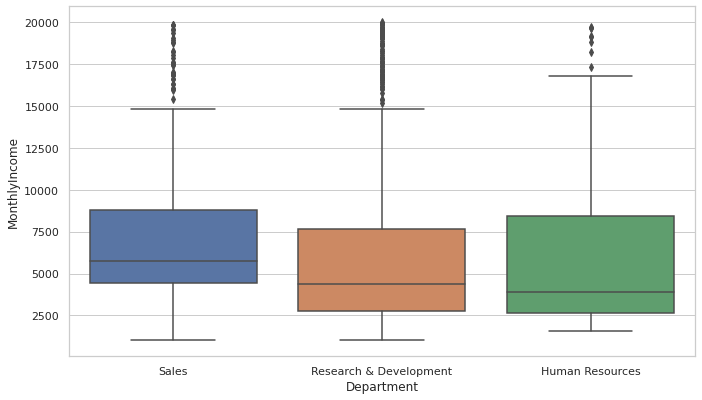

In [73]:
plt.figure(figsize=[10,6])
sns.boxplot(data=data, x="Department", y="MonthlyIncome")

We have outlier values in all three departments.

<AxesSubplot:xlabel='Department', ylabel='YearsAtCompany'>

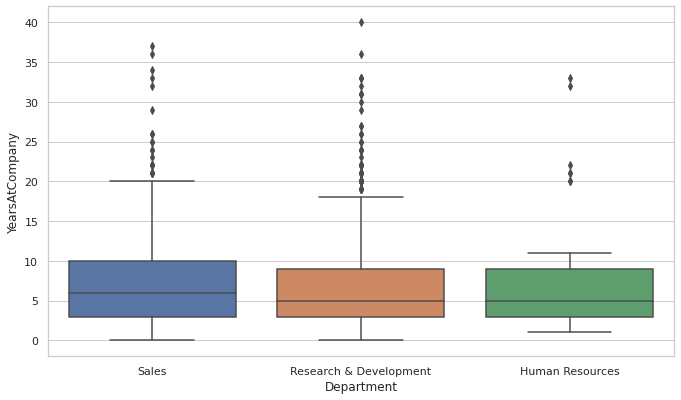

In [74]:
plt.figure(figsize=[10,6])
sns.boxplot(data=data, x="Department", y="YearsAtCompany")

Here we again have outlier values in all the departments.

<AxesSubplot:xlabel='Education', ylabel='MonthlyIncome'>

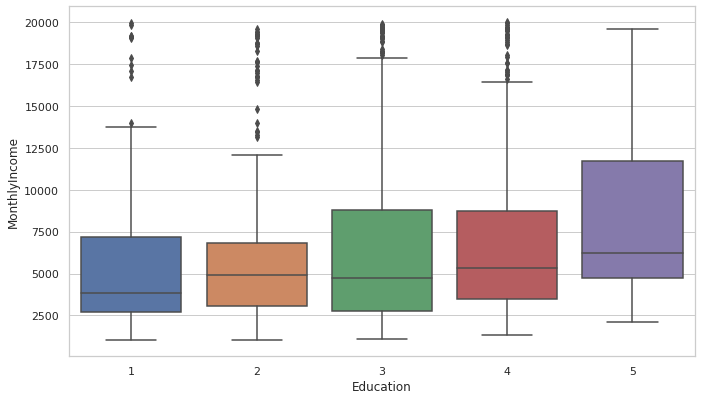

In [75]:
plt.figure(figsize=[10,6])
sns.boxplot(data=data, x="Education", y="MonthlyIncome")

1,2,3,4 have outlier values while 5 (Doctor) has none.

<AxesSubplot:xlabel='Education', ylabel='YearsAtCompany'>

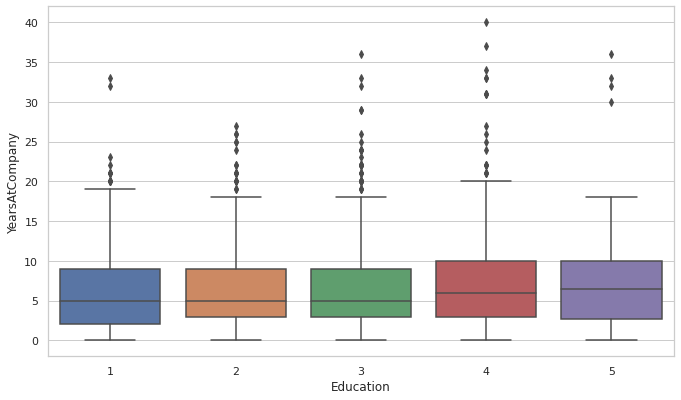

In [76]:
plt.figure(figsize=[10,6])
sns.boxplot(data=data, x="Education", y="YearsAtCompany")

<AxesSubplot:xlabel='EducationField', ylabel='MonthlyIncome'>

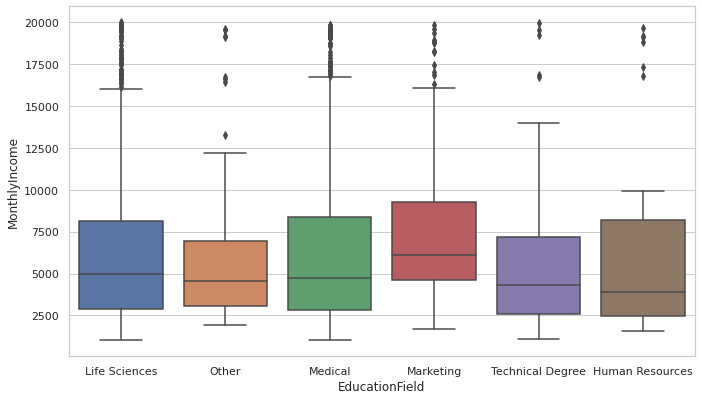

In [77]:
plt.figure(figsize=[10,6])
sns.boxplot(data=data, x="EducationField", y="MonthlyIncome")

<AxesSubplot:xlabel='EducationField', ylabel='YearsAtCompany'>

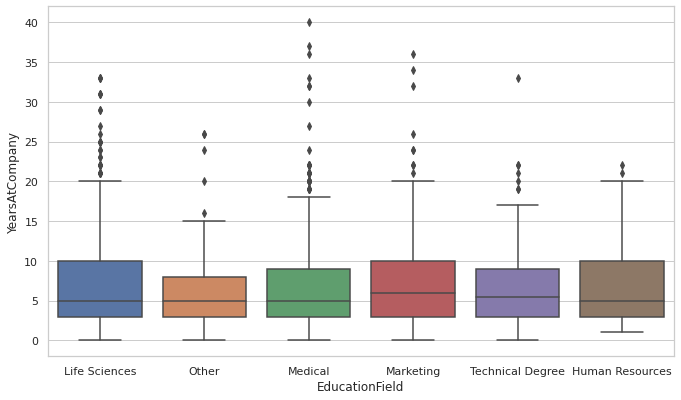

In [78]:
plt.figure(figsize=[10,6])
sns.boxplot(data=data, x="EducationField", y="YearsAtCompany")

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='MonthlyIncome'>

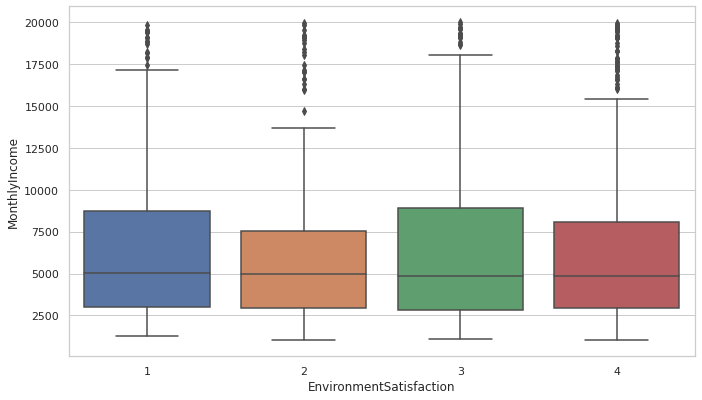

In [79]:
plt.figure(figsize=[10,6])
sns.boxplot(data=data, x="EnvironmentSatisfaction", y="MonthlyIncome")

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='YearsAtCompany'>

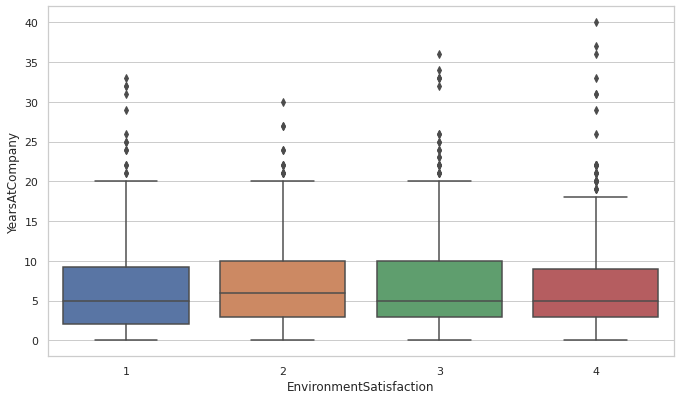

In [80]:
plt.figure(figsize=[10,6])
sns.boxplot(data=data, x="EnvironmentSatisfaction", y="YearsAtCompany")

<AxesSubplot:xlabel='JobSatisfaction', ylabel='MonthlyIncome'>

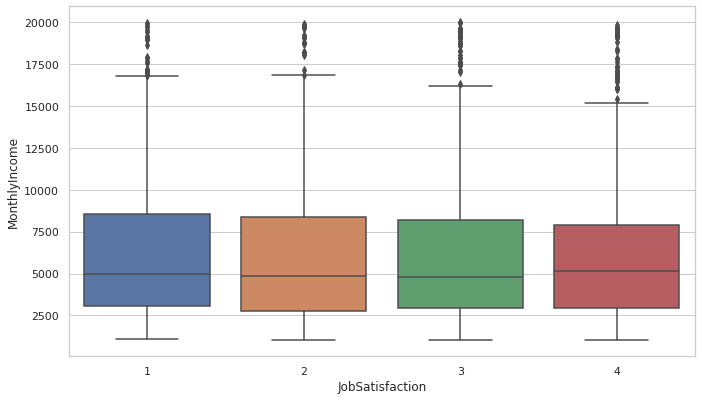

In [81]:
plt.figure(figsize=[10,6])
sns.boxplot(data=data, x="JobSatisfaction", y="MonthlyIncome")

<AxesSubplot:xlabel='JobSatisfaction', ylabel='YearsAtCompany'>

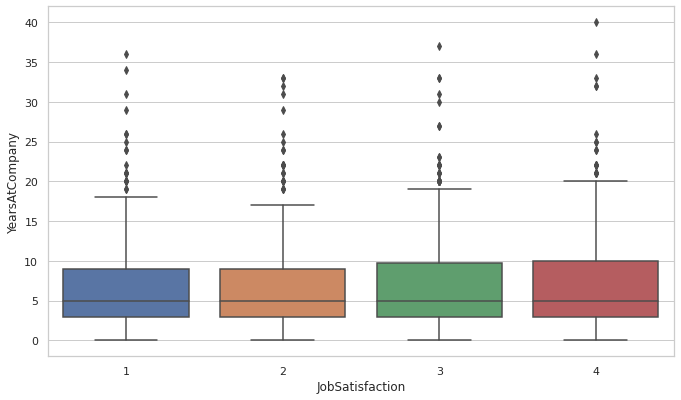

In [82]:
plt.figure(figsize=[10,6])
sns.boxplot(data=data, x="JobSatisfaction", y="YearsAtCompany")

<AxesSubplot:xlabel='MaritalStatus', ylabel='MonthlyIncome'>

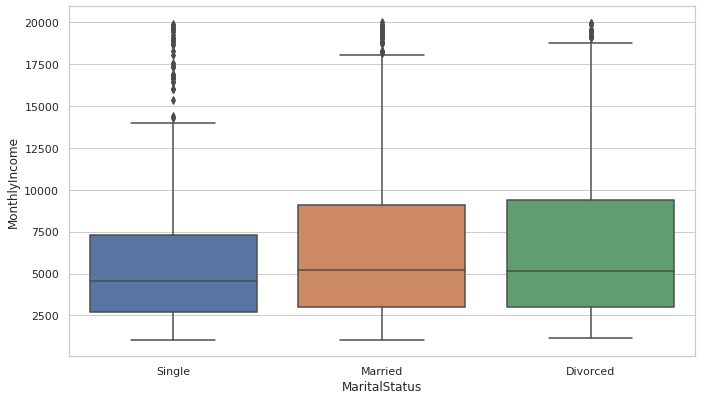

In [83]:
plt.figure(figsize=[10,6])
sns.boxplot(data=data, x="MaritalStatus", y="MonthlyIncome")

<AxesSubplot:xlabel='MaritalStatus', ylabel='MonthlyIncome'>

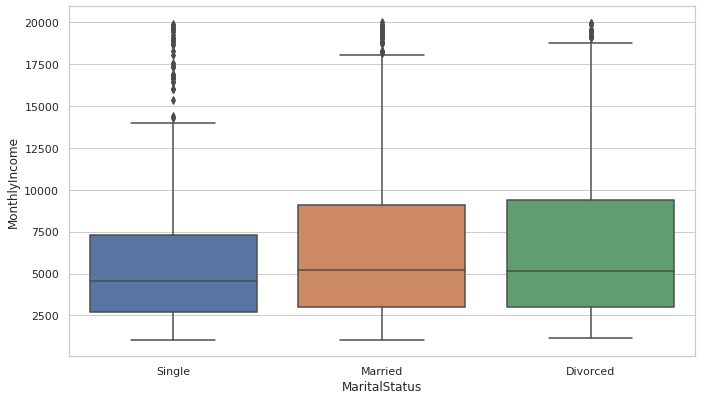

In [84]:
plt.figure(figsize=[10,6])
sns.boxplot(data=data, x="MaritalStatus", y="MonthlyIncome")

<AxesSubplot:xlabel='MaritalStatus', ylabel='YearsAtCompany'>

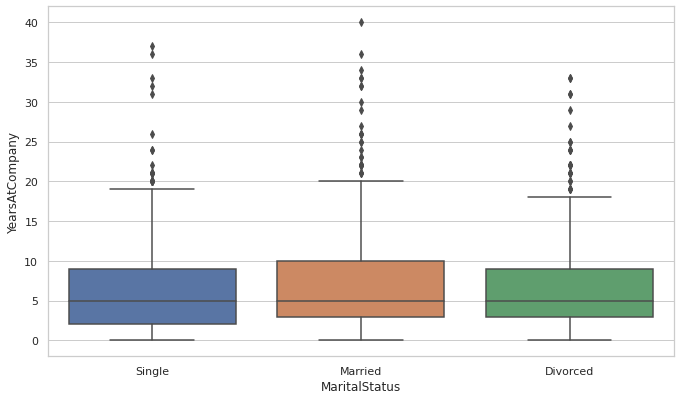

In [85]:
plt.figure(figsize=[10,6])
sns.boxplot(data=data, x="MaritalStatus", y="YearsAtCompany")

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='MonthlyIncome'>

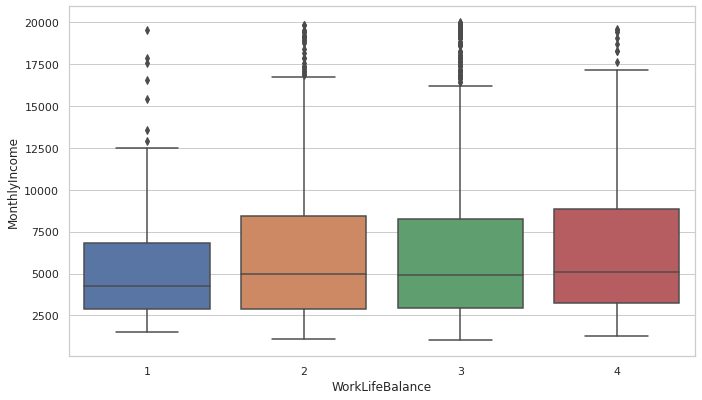

In [86]:
plt.figure(figsize=[10,6])
sns.boxplot(data=data, x="WorkLifeBalance", y="MonthlyIncome")

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='YearsAtCompany'>

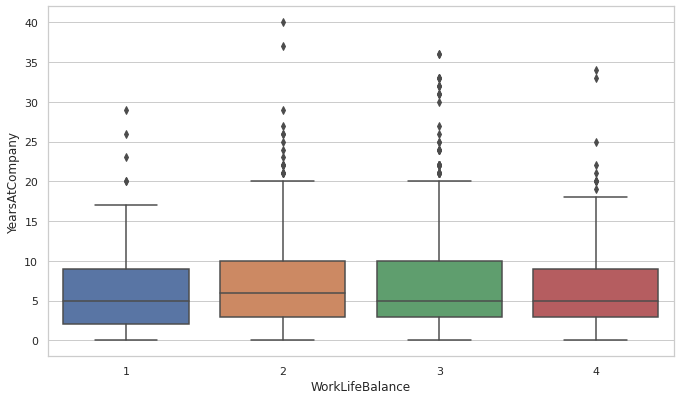

In [87]:
plt.figure(figsize=[10,6])
sns.boxplot(data=data, x="WorkLifeBalance", y="YearsAtCompany")

In [88]:
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [89]:
data.dtypes

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

In [90]:
data["Education"] = data["Education"].astype("category")
data["EnvironmentSatisfaction"] = data["EnvironmentSatisfaction"].astype("category")
data["JobSatisfaction"] = data["JobSatisfaction"].astype("category")
data["WorkLifeBalance"] = data["WorkLifeBalance"].astype("category")

In [91]:
data.dtypes

Age                           int64
Attrition                    object
Department                   object
DistanceFromHome              int64
Education                  category
EducationField               object
EnvironmentSatisfaction    category
JobSatisfaction            category
MaritalStatus                object
MonthlyIncome                 int64
NumCompaniesWorked            int64
WorkLifeBalance            category
YearsAtCompany                int64
dtype: object

In [92]:
data_num = data.select_dtypes(include=["int64", "float64"])
data_cat = data.select_dtypes(exclude=["int64", "float64"])

In [93]:
data_num.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany
0,41,1,5993,8,6
1,49,8,5130,1,10
2,37,2,2090,6,0
3,33,3,2909,1,8
4,27,2,3468,9,2


In [94]:
data_cat.head()

,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,WorkLifeBalance
0,Yes,Sales,2,Life Sciences,2,4,Single,1
1,No,Research & Development,1,Life Sciences,3,2,Married,3
2,Yes,Research & Development,2,Other,4,3,Single,3
3,No,Research & Development,4,Life Sciences,4,3,Married,3
4,No,Research & Development,1,Medical,1,2,Married,3


Since only Age feature is normally distributed, other features like DistanceFromHome, MonthlySalary, NumCompaniesWork, YearsAtCompany are right skewed distribution. We have to convert these features to make them normally distributed.

#### Remove Outliers

###### DistanceFromHome

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9cbd87cf10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9cbd8827d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9cbd87ca50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9cbd88d0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9cbd88d510>],
 'means': []}

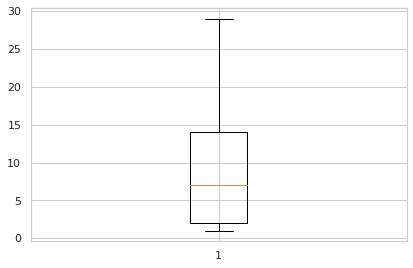

In [95]:
plt.boxplot(data_num["DistanceFromHome"])

In [96]:
data_num["DistanceFromHome"].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

Difference between 3rd quartile and max value is huge as compared to minimum and 1st quartile. And mean > median which tells us that it is right skewed.

We will use IQR technique for outliers.

In [97]:
dfh_IQR = data_num.DistanceFromHome.quantile(0.75)-data_num.DistanceFromHome.quantile(0.25)

In [98]:
lower_bridge = data_num["DistanceFromHome"].quantile(0.25)-(dfh_IQR*1.5)
upper_bridge = data_num["DistanceFromHome"].quantile(0.75)+(dfh_IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-16.0
32.0


Here we can see that no outliers in DistanceFromHome feature. The distribution is just skewed which we can convert to normal distribution using box-cox transformation.

###### Age

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9cbd7fa190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9cbd7faa10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9cbd825290>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9cbd804310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9cbd804750>],
 'means': []}

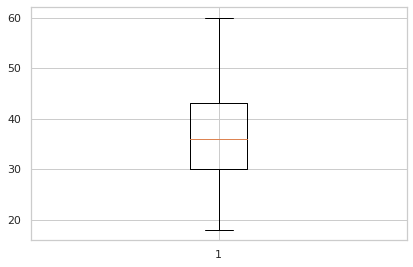

In [99]:
plt.boxplot(data_num["Age"])

In [100]:
data_num["Age"].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

Here the distribution is normal. So we apply different method to check for outliers.

In [101]:
upper_boundary = data_num["Age"].mean()+3*data_num["Age"].std()
lower_boundary = data_num["Age"].mean()-3*data_num["Age"].std()
print(lower_boundary)
print(upper_boundary)

9.51768905639932
64.32992999121973


Here we also see that there is no outlier.

###### MonthlyIncome

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9cbd763950>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9cbd76b210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9cbd7a3750>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9cbd76bad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9cbd76bf10>],
 'means': []}

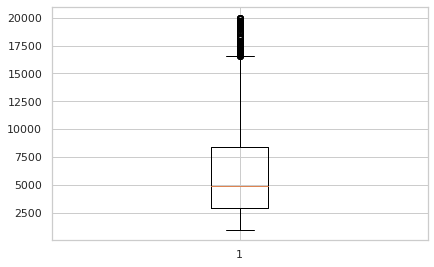

In [102]:
plt.boxplot(data_num["MonthlyIncome"])

In [103]:
data_num["MonthlyIncome"].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

The mean > median values are not equal and there is huge difference between 3rd quantile and maximum value. We can say it is right skewed distribution.

We will use IQR technique for outliers.

In [104]:
mi_IQR = data_num.MonthlyIncome.quantile(0.75)-data_num.MonthlyIncome.quantile(0.25)

In [105]:
lower_bridge = data_num["MonthlyIncome"].quantile(0.25)-(mi_IQR*1.5)
upper_bridge = data_num["MonthlyIncome"].quantile(0.75)+(mi_IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-5291.0
16581.0


lower_bridge for MonthlyIncome is negative. Which can not happen, hence we can take lower_bridge to be 0.

In [106]:
data_num.loc[data["MonthlyIncome"]>16581].count()[2]

114

In [107]:
### We can take monthlyincome above 16581 to be 16581, to remove outliers.
data_num.loc[data_num["MonthlyIncome"]>16581, "MonthlyIncome"] = 16581

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


###### NumCompaniesWorked

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9cbd70e450>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9cbd70ecd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9cbd795a10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9cbd6985d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9cbd698a10>],
 'means': []}

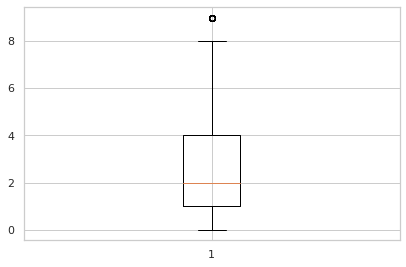

In [108]:
plt.boxplot(data_num["NumCompaniesWorked"])

In [109]:
data_num["NumCompaniesWorked"].describe()

count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

Here the data does not look skewed as mean and median are nearly equal but 3rd quantile and max value are far apart.

We will use IQR technique for outliers.

In [110]:
ncw_IQR = data_num.NumCompaniesWorked.quantile(0.75)-data_num.NumCompaniesWorked.quantile(0.25)

In [111]:
lower_bridge = data_num["NumCompaniesWorked"].quantile(0.25)-(ncw_IQR*1.5)
upper_bridge = data_num["NumCompaniesWorked"].quantile(0.75)+(ncw_IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-3.5
8.5


We can ignore lower_bridge value since having negative value as NumCompaniesWorked is illogical.

In [112]:
### We can take NumCompaniesWorked above 8.5 to be 8.5
data_num.loc[data_num["NumCompaniesWorked"]>8.5, "NumCompaniesWorked"] = 8.5

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


###### YearsAtCompany

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9cbd6812d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9cbd681b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9cbd7046d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9cbd68c450>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9cbd68c890>],
 'means': []}

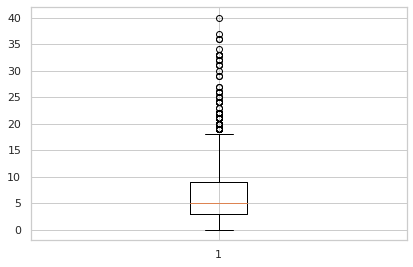

In [113]:
plt.boxplot(data_num["YearsAtCompany"])

In [114]:
data_num["YearsAtCompany"].describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

Here mean > median and there is huge gap between 3rd quantile and max value. We can say that this is right skewed data.

We will use IQR technique for outliers.

In [115]:
yac_IQR = data_num.YearsAtCompany.quantile(0.75)-data_num.YearsAtCompany.quantile(0.25)

In [116]:
lower_bridge = data_num["YearsAtCompany"].quantile(0.25)-(yac_IQR*1.5)
upper_bridge = data_num["YearsAtCompany"].quantile(0.75)+(yac_IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-6.0
18.0


Having negative years as working at company is not appropriate value.

In [117]:
data_num.loc[data_num["YearsAtCompany"]>18].count()

Age                   104
DistanceFromHome      104
MonthlyIncome         104
NumCompaniesWorked    104
YearsAtCompany        104
dtype: int64

In [118]:
### We can replace values in YearsAtCompany above 18 to be 18.
data_num.loc[data_num["YearsAtCompany"]>18, "YearsAtCompany"] = 18

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [119]:
data_num.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany
0,41,1,5993,8.0,6
1,49,8,5130,1.0,10
2,37,2,2090,6.0,0
3,33,3,2909,1.0,8
4,27,2,3468,8.5,2


In [120]:
from scipy import stats
boxcox_DistanceFromHome = stats.boxcox(data_num["DistanceFromHome"])[0]
pd.Series(boxcox_DistanceFromHome).skew()

-0.060045661396076644

<AxesSubplot:>

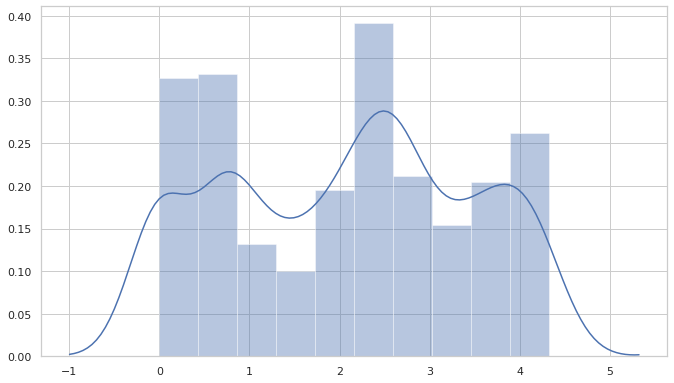

In [121]:
plt.figure(figsize=[10,6])
sns.distplot(boxcox_DistanceFromHome)

In [122]:
boxcox_MonthlyIncome = stats.boxcox(data_num["MonthlyIncome"])[0]
pd.Series(boxcox_MonthlyIncome).skew()

0.02747260059106146

<AxesSubplot:>

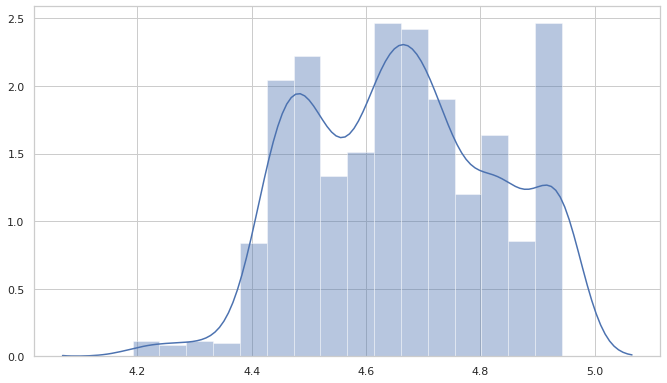

In [123]:
plt.figure(figsize=[10,6])
sns.distplot(boxcox_MonthlyIncome)

In [124]:
sqrt_NumCompaniesWorked = np.sqrt(data_num["NumCompaniesWorked"])
sqrt_NumCompaniesWorked.skew()

0.004445534275462765

<AxesSubplot:xlabel='NumCompaniesWorked'>

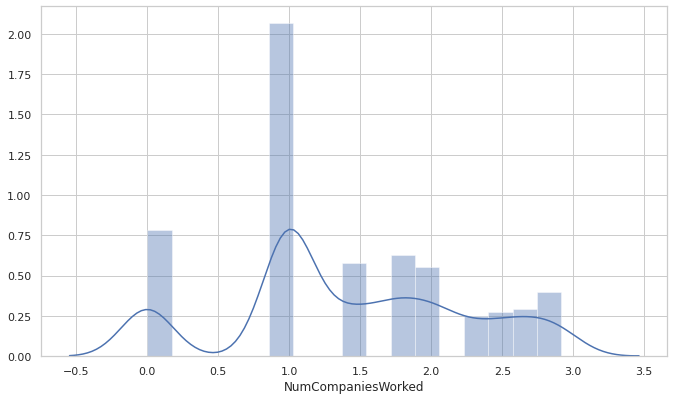

In [125]:
plt.figure(figsize=[10,6])
sns.distplot(sqrt_NumCompaniesWorked)

In [126]:
sqrt_YearsAtCompany = np.sqrt(data_num["YearsAtCompany"])
sqrt_YearsAtCompany.skew()

0.012045375994137996

<AxesSubplot:xlabel='YearsAtCompany'>

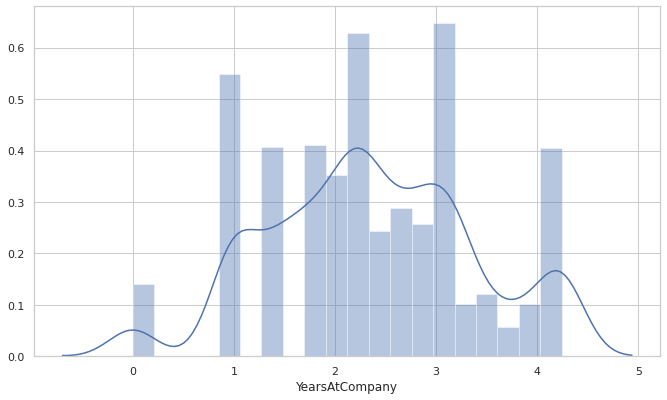

In [127]:
plt.figure(figsize=[10,6])
sns.distplot(sqrt_YearsAtCompany)

In [128]:
data_num["DistanceFromHome"] = boxcox_DistanceFromHome
data_num["MonthlyIncome"] = boxcox_MonthlyIncome
data_num["NumCompaniesWorked"] = sqrt_NumCompaniesWorked
data_num["YearsAtCompany"] = sqrt_YearsAtCompany

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [129]:
data_num.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany
0,41,0.000000,4.707470,2.828427,2.449490
1,49,2.422421,4.668079,1.000000,3.162278
2,37,0.728735,4.420483,2.449490,0.000000
3,33,1.189800,4.515798,1.000000,2.828427
4,27,0.728735,4.564459,2.915476,1.414214


In [130]:
data_num.describe()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.082505,4.659957,1.414416,2.363315
std,9.135373,1.348367,0.165641,0.821826,1.016432
min,18.000000,0.000000,4.191995,0.000000,0.000000
25%,30.000000,0.728735,4.515991,1.000000,1.732051
50%,36.000000,2.244253,4.657270,1.414214,2.236068
75%,43.000000,3.207319,4.789128,2.000000,3.000000
max,60.000000,4.327651,4.942540,2.915476,4.242641


This data_num our numerical dataset is normally distributed.

Now we move on to categorical dataset.

In [131]:
data_cat.head()

,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,WorkLifeBalance
0,Yes,Sales,2,Life Sciences,2,4,Single,1
1,No,Research & Development,1,Life Sciences,3,2,Married,3
2,Yes,Research & Development,2,Other,4,3,Single,3
3,No,Research & Development,4,Life Sciences,4,3,Married,3
4,No,Research & Development,1,Medical,1,2,Married,3


In [132]:
data_cat.dtypes

Attrition                    object
Department                   object
Education                  category
EducationField               object
EnvironmentSatisfaction    category
JobSatisfaction            category
MaritalStatus                object
WorkLifeBalance            category
dtype: object

In [133]:
data_cat['Attrition'].replace('Yes',1, inplace=True)
data_cat['Attrition'].replace('No',0, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [134]:
data_cat.dtypes

Attrition                     int64
Department                   object
Education                  category
EducationField               object
EnvironmentSatisfaction    category
JobSatisfaction            category
MaritalStatus                object
WorkLifeBalance            category
dtype: object

In [135]:
data_cat_dummies = pd.get_dummies(data_cat)
data_cat_dummies.head()

,Attrition,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,...,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


##### Scaling the data

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()
data_scaler = scaler.fit_transform(data_num)
data_num_sc = pd.DataFrame(data_scaler, index = data_num.index, columns = data_num.columns)

In [138]:
data_num_sc.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany
0,0.446350,-1.544990,0.286941,1.721158,0.084811
1,1.322365,0.252181,0.049050,-0.504434,0.786314
2,0.008343,-1.004348,-1.446238,1.259909,-2.325899
3,-0.429664,-0.662289,-0.870612,-0.504434,0.457749
4,-1.086676,-1.004348,-0.576734,1.827116,-0.934075


In [139]:
data_final = pd.concat([data_num_sc, data_cat_dummies], axis=1)
data_final.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany,Attrition,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,...,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.446350,-1.544990,0.286941,1.721158,0.084811,1,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
1,1.322365,0.252181,0.049050,-0.504434,0.786314,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0.008343,-1.004348,-1.446238,1.259909,-2.325899,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,-0.429664,-0.662289,-0.870612,-0.504434,0.457749,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
4,-1.086676,-1.004348,-0.576734,1.827116,-0.934075,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0


This completes our dataset which is to be fed to the Logistic Regression model

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
Y = data_final["Attrition"]
X = data_final.drop(["Attrition"], axis=1)
print(X.shape)
print(Y.shape)

(1470, 34)
(1470,)


In [142]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=87)

In [143]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 34)
(294, 34)
(1176,)
(294,)


In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [146]:
y_pred = log_reg.predict(x_test)

In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [148]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.8401360544217688


In [149]:
print("Confusion Matrix:\n ", confusion_matrix(y_test, y_pred))

Confusion Matrix:
  [[241   2]
 [ 45   6]]


In [150]:
print("Classification Report:\n ", classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.84      0.99      0.91       243
           1       0.75      0.12      0.20        51

    accuracy                           0.84       294
   macro avg       0.80      0.55      0.56       294
weighted avg       0.83      0.84      0.79       294



In [151]:
print("Area under the curve:\n ", roc_auc_score(y_test, y_pred))

Area under the curve:
  0.5547083030743162


In [152]:
crange = np.arange(0.5, 20.0, 0.5)
grid_param = {"penalty": ["l1", "l2"],
              "C": crange,
              "fit_intercept": [True, False] }

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
# logistic model classifier
log_reg_grid = LogisticRegression()
# define evaluation procedure
grid = GridSearchCV(log_reg_grid, grid_param, scoring="roc_auc", cv=10, n_jobs=-1, refit=True)
grid.fit(X,Y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.7575874107268422 with param: {'C': 0.5, 'fit_intercept': False, 'penalty': 'l2'}


#### Building logistic regression model with above optimal values.

In [155]:
# define model
log_reg_2 = LogisticRegression(C=0.5, fit_intercept=False, penalty='l2')
# fit it
log_reg_2.fit(x_train,y_train)
# test
y_pred_2 = log_reg_2.predict(x_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_2)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_2)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_2)}') # 0.5
print(f'Classification report:\n {classification_report(y_test,y_pred_2)}')

Accuracy Score: 0.8401360544217688
Confusion Matrix: 
[[241   2]
 [ 45   6]]
Area Under Curve: 0.5547083030743162
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       243
           1       0.75      0.12      0.20        51

    accuracy                           0.84       294
   macro avg       0.80      0.55      0.56       294
weighted avg       0.83      0.84      0.79       294

